![](https://images.pexels.com/photos/3775163/pexels-photo-3775163.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260)

# Face Detection with dnn

Kevin J. Walchko, Phd

7 Oct 2018

---

## References

- [caffe and deep neural networks](http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html)
- [OpenCV 3.4.3 docs on dnn](https://docs.opencv.org/3.4/d2/d58/tutorial_table_of_content_dnn.html)
- [pyimagesearch.com dnn tutorial](https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/)
- [Facial Recognition using cascade filters](https://www.superdatascience.com/opencv-face-recognition/)
- [pyimagesearch.com deep learning object detection](https://www.pyimagesearch.com/2018/05/14/a-gentle-guide-to-deep-learning-object-detection/)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")

In [4]:
def findFaces(img, net):
    image = img.copy()
    mean = [int(image[:, :, i].mean()) for i in range(img.shape[-1])]
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(
        cv2.resize(image, (300, 300)), # image
        1.0,                           # scale
        (300, 300),                    # size
        mean,                          # average color
        True
    )
    net.setInput(blob)
    detections = net.forward()
    
    # draw detections
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(
                image,
                (startX, startY),
                (endX, endY),
                (0, 0, 255), 
                2
            )
            cv2.putText(
                image,
                text,
                (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255),
                2
            )
    return image

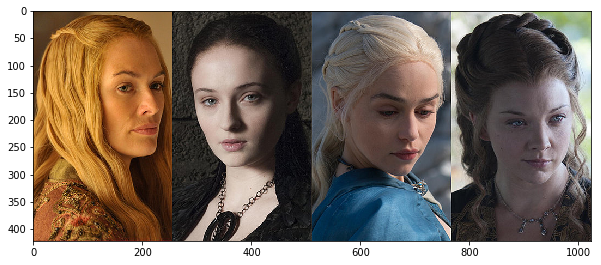

In [5]:
image = cv2.imread('face_pics/got3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # pretty images
plt.figure(figsize=(10,8))
plt.imshow(image);

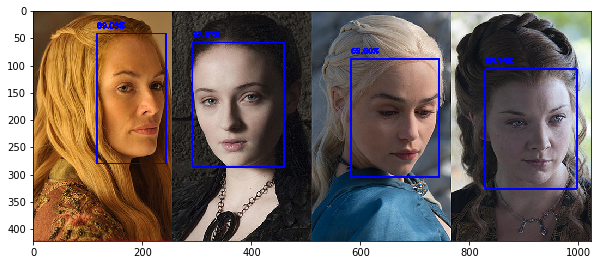

In [6]:
img = findFaces(image, net)
plt.figure(figsize=(10,8))
plt.imshow(img);

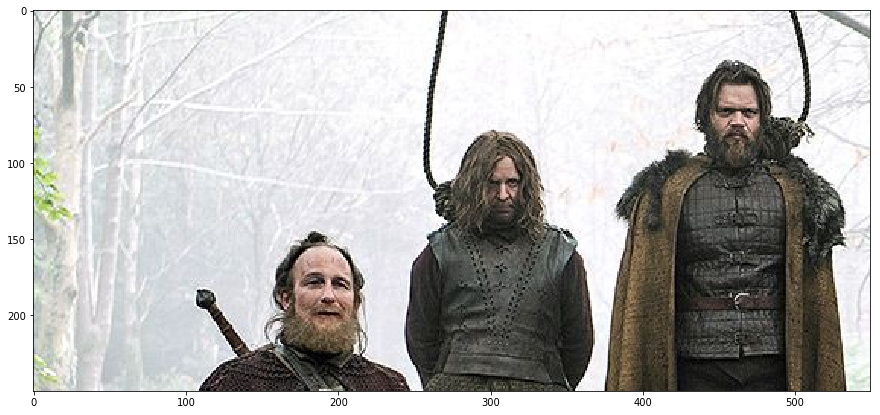

In [7]:
image = cv2.imread('face_pics/got1.jpg')

# if the image is too big, then the dnn fails because of resizing
image = image[:250,:550]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # pretty images
plt.figure(figsize=(15,8))
plt.imshow(image);

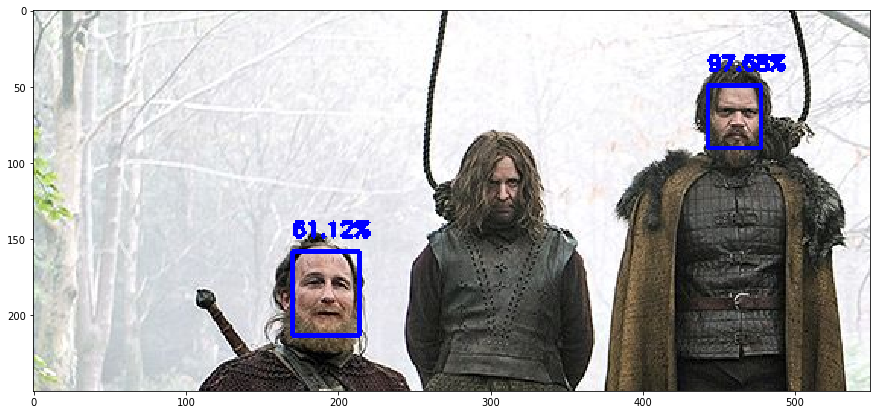

In [8]:
img = findFaces(image, net)
plt.figure(figsize=(15,8))
plt.imshow(img);

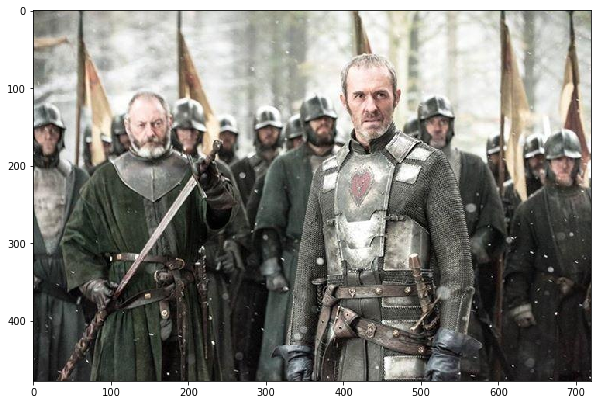

In [9]:
image = cv2.imread('face_pics/got2.jpg')
# image = image[:250,:600]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # pretty images
plt.figure(figsize=(10,8))
plt.imshow(image);

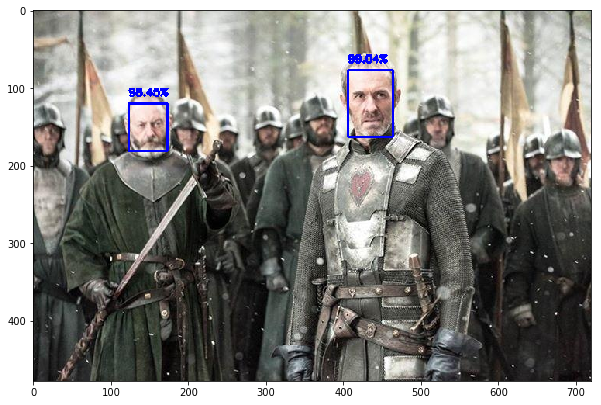

In [10]:
img = findFaces(image, net)
plt.figure(figsize=(10,8))
plt.imshow(img);


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.